<a href="https://colab.research.google.com/github/Rahul-Chouhan-407/Practice_and_Assignments/blob/main/Module_6_RNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 6: RNN Assignment**

**Tasks to be Done:**
Using airline-passenger Dataset try to predict the number of passengers for next month,given the number of passengers (in units of thousands) for this month

**A. You can write a simple function to convert our single column of data into a two-column dataset:**

a. The first column containing this month’s (t) passenger count and the second
column containing next month’s (t+1) passenger count, to be predicted.

b. Divide the data into train and test set

c. Fit an LSTM model on top of the data where the optimizer = ‘adam’ and epoch
=’100’

d. Build another model where optimizer = ‘sgd’ and epoch = ‘50’

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
df = pd.read_csv('/content/airline-passengers.csv', usecols=[1])

In [6]:
# Convert the data into a two-column dataset
data = df.values.astype('float32')
look_back = 1
trainX, trainY = [], []
for i in range(len(data)-look_back-1):
    trainX.append(data[i:i+look_back, 0])
    trainY.append(data[i+look_back, 0])
trainX = np.array(trainX)
trainY = np.array(trainY)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [7]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
trainX, testX = trainX[0:train_size,:,:], trainX[train_size:len(data),:,:]
trainY, testY = trainY[0:train_size], trainY[train_size:len(data)]

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
trainX = scaler.fit_transform(trainX.reshape(-1, 1)).reshape(trainX.shape)
testX = scaler.transform(testX.reshape(-1, 1)).reshape(testX.shape)

In [9]:
# Create and fit an LSTM network with adam optimizer
model1 = Sequential()
model1.add(LSTM(4, input_shape=(1, look_back)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
96/96 - 3s - loss: 51668.1562 - 3s/epoch - 35ms/step
Epoch 2/100
96/96 - 0s - loss: 51581.9023 - 176ms/epoch - 2ms/step
Epoch 3/100
96/96 - 0s - loss: 51477.1406 - 187ms/epoch - 2ms/step
Epoch 4/100
96/96 - 0s - loss: 51336.3789 - 202ms/epoch - 2ms/step
Epoch 5/100
96/96 - 0s - loss: 51152.6875 - 175ms/epoch - 2ms/step
Epoch 6/100
96/96 - 0s - loss: 50926.3633 - 184ms/epoch - 2ms/step
Epoch 7/100
96/96 - 0s - loss: 50669.1211 - 198ms/epoch - 2ms/step
Epoch 8/100
96/96 - 0s - loss: 50395.2305 - 171ms/epoch - 2ms/step
Epoch 9/100
96/96 - 0s - loss: 50120.1250 - 172ms/epoch - 2ms/step
Epoch 10/100
96/96 - 0s - loss: 49851.9570 - 181ms/epoch - 2ms/step
Epoch 11/100
96/96 - 0s - loss: 49591.6875 - 198ms/epoch - 2ms/step
Epoch 12/100
96/96 - 0s - loss: 49340.7930 - 201ms/epoch - 2ms/step
Epoch 13/100
96/96 - 0s - loss: 49098.6055 - 211ms/epoch - 2ms/step
Epoch 14/100
96/96 - 0s - loss: 48865.0273 - 220ms/epoch - 2ms/step
Epoch 15/100
96/96 - 0s - loss: 48639.1289 - 202ms/epoch - 

In [10]:
# Create and fit another LSTM network with sgd optimizer
model2 = Sequential()
model2.add(LSTM(4, input_shape=(1, look_back)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='sgd')
model2.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
96/96 - 2s - loss: 10358.3193 - 2s/epoch - 20ms/step
Epoch 2/50
96/96 - 0s - loss: 5675.0327 - 165ms/epoch - 2ms/step
Epoch 3/50
96/96 - 0s - loss: 5346.6841 - 160ms/epoch - 2ms/step
Epoch 4/50
96/96 - 0s - loss: 4551.0532 - 167ms/epoch - 2ms/step
Epoch 5/50
96/96 - 0s - loss: 3107.1208 - 165ms/epoch - 2ms/step
Epoch 6/50
96/96 - 0s - loss: 2760.4822 - 175ms/epoch - 2ms/step
Epoch 7/50
96/96 - 0s - loss: 2791.8723 - 160ms/epoch - 2ms/step
Epoch 8/50
96/96 - 0s - loss: 2889.0283 - 193ms/epoch - 2ms/step
Epoch 9/50
96/96 - 0s - loss: 5681.6294 - 158ms/epoch - 2ms/step
Epoch 10/50
96/96 - 0s - loss: 3833.4265 - 186ms/epoch - 2ms/step
Epoch 11/50
96/96 - 0s - loss: 4131.3745 - 191ms/epoch - 2ms/step
Epoch 12/50
96/96 - 0s - loss: 3158.2439 - 202ms/epoch - 2ms/step
Epoch 13/50
96/96 - 0s - loss: 3009.5771 - 187ms/epoch - 2ms/step
Epoch 14/50
96/96 - 0s - loss: 2582.0388 - 175ms/epoch - 2ms/step
Epoch 15/50
96/96 - 0s - loss: 2247.7747 - 166ms/epoch - 2ms/step
Epoch 16/50
96/96 - 

In [11]:
# Make predictions
trainPredict1 = model1.predict(trainX)
testPredict1 = model1.predict(testX)
trainPredict2 = model2.predict(trainX)
testPredict2 = model2.predict(testX)

2/2 [==============================] - 1s 11ms/step


In [12]:
# Invert predictions back to original scale
trainPredict1 = scaler.inverse_transform(trainPredict1)
trainY = scaler.inverse_transform([trainY])
testPredict1 = scaler.inverse_transform(testPredict1)
testY = scaler.inverse_transform([testY])
trainPredict2 = scaler.inverse_transform(trainPredict2)
testPredict2 = scaler.inverse_transform(testPredict2)

In [13]:
# Calculate root mean squared error
trainScore1 = np.sqrt(np.mean(np.square(trainY - trainPredict1)))
testScore1 = np.sqrt(np.mean(np.square(testY - testPredict1)))
trainScore2 = np.sqrt(np.mean(np.square(trainY - trainPredict2)))
testScore2 = np.sqrt(np.mean(np.square(testY - testPredict2)))

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


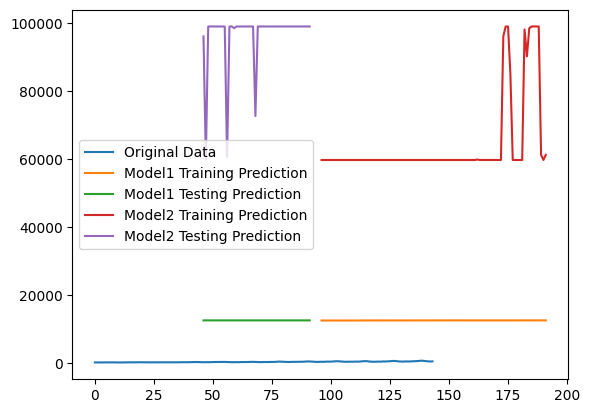

In [14]:
# Plot the results
plt.plot(df.values, label='Original Data')
plt.plot([None for i in trainPredict1] + [x for x in trainPredict1], label='Model1 Training Prediction')
plt.plot([None for i in testPredict1] + [x for x in testPredict1], label='Model1 Testing Prediction')
plt.plot([None for i in trainPredict2] + [x for x in trainPredict2], label='Model2 Training Prediction')
plt.plot([None for i in testPredict2] + [x for x in testPredict2], label='Model2 Testing Prediction')
plt.legend()
plt.show()